#####Libraries
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from scipy.stats import norm
import statsmodels.api as sm
from patsy import dmatrices #a Python library for describing statistical models and building Design Matrices using R-like formulas.
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px 
from statsmodels.tsa.api import SimpleExpSmoothing
from statistics import stdev
from statistics import mean

In [2]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 10.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#φτιάχνω τη λίστα με τα assets μου -> 50 μετοχές 
#διόρθωση : θα βγάλω τυχαία άλλες 4 μετοχές μαζί με την OGN επειδή δεν έχει το ίδιο μέγεθος με τις άλλες 
#βγάζω OGN ,WRK,HST,CE,ACN
assets= ["ABBV","AEP","AIZ","ALLE","AMAT","AMP","AMZN","AVB","AVY",   
  "AXP","BDX","BF-B","BMY","BR","CARR","CDW","CHTR","CNC",   
  "CNP","COP","CTAS","CZR","DG","DPZ","DRE","DXC","META","FTV",   
  "GOOG","GPC","HIG","JPM","KR","PG","PPL","PRU",   
  "PYPL","RE","ROL","ROST","UNH","URI","V","VRSK","XOM"]

####Ranking
***
ranking της επόμενης μέρας κάθε φορά 

In [4]:
#άρα πρέπει να κατεβάσουμε όλα τα adj close για όλες τις τιμές όλων των μετοχών και να κάνουμε απόλυτο ranking και σε 5 κλασεις (targets)
r=pd.DataFrame(index=pdr.get_data_yahoo(assets[0],'2021-01-01','2022-04-01')['Adj Close'].index)

[*********************100%***********************]  1 of 1 completed


In [5]:
#παίρνω τιμές για ένα χρόνο και 3 μήνες
for i in assets:
  # print('i metoxi me onoma:',i,'exei megethos',pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close'].count())
  temp= pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close']
  temp=temp.dropna()
  r[i]=temp.values

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
#φτιάχνω ένα αντίγραφο με τις τιμές για να το έχω 
rd=pd.DataFrame(r)
rd

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,96.813492,76.819252,128.242004,111.874283,85.672478,182.556015,159.331497,147.581146,148.152344,115.185814,...,70.458313,231.919998,218.876434,37.469650,114.689148,341.345001,229.649994,215.285751,200.593613,37.906914
2021-01-05 00:00:00-05:00,97.814583,76.715622,128.280838,112.089279,88.364830,181.488510,160.925507,147.154114,148.474213,115.800575,...,71.140755,234.910004,217.072540,38.086960,114.787102,336.754639,235.570007,212.072693,199.693878,39.733746
2021-01-06 00:00:00-05:00,96.969612,77.327988,133.911011,114.639870,89.577888,191.901703,156.919006,151.101746,154.150620,120.084412,...,75.355347,226.830002,229.939713,38.714066,119.802986,350.887024,256.549988,210.204147,197.805389,40.747639
2021-01-07 00:00:00-05:00,98.007462,75.264786,135.260330,117.659546,93.256454,194.221130,158.108002,149.042526,158.958969,119.134560,...,75.023331,235.039993,231.590088,39.360771,119.538475,356.512604,264.679993,211.380646,198.705124,41.067341
2021-01-08 00:00:00-05:00,98.521782,74.595886,134.551712,117.249092,94.242676,195.599197,159.134995,150.352097,152.882706,119.252068,...,74.423889,242.460007,229.296829,39.978077,119.920547,354.910889,260.149994,213.002014,198.635925,41.524048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25 00:00:00-04:00,156.891495,95.333153,183.029373,111.363403,136.376923,311.729828,164.773499,241.656281,171.694946,188.315094,...,118.004997,113.760002,295.426666,33.621418,89.567093,509.607941,363.670013,217.628159,207.255630,83.524574
2022-03-28 00:00:00-04:00,157.513901,96.091171,182.225754,112.533562,136.973938,308.232391,168.990494,244.344177,172.051941,187.741089,...,117.223892,116.169998,294.201538,34.228012,90.897392,509.776794,363.399994,219.959564,210.842743,81.181572
2022-03-29 00:00:00-04:00,157.718109,97.154373,179.884308,114.090469,140.735092,309.342041,169.315002,252.427414,177.406876,188.968292,...,118.004997,121.180000,298.953888,34.953945,94.858521,507.323273,365.200012,227.282578,214.031296,80.750229


In [7]:
rd1= rd.pct_change().shift(-1)
rd1

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,0.010340,-0.001349,0.000303,0.001922,0.031426,-0.005848,0.010004,-0.002894,0.002173,0.005337,...,0.009686,0.012892,-0.008242,0.016475,0.000854,-0.013448,0.025778,-0.014925,-0.004485,0.048193
2021-01-05 00:00:00-05:00,-0.008638,0.007982,0.043889,0.022755,0.013728,0.057377,-0.024897,0.026827,0.038232,0.036993,...,0.059243,-0.034396,0.059276,0.016465,0.043697,0.041966,0.089060,-0.008811,-0.009457,0.025517
2021-01-06 00:00:00-05:00,0.010703,-0.026681,0.010076,0.026341,0.041066,0.012087,0.007577,-0.013628,0.031193,-0.007910,...,-0.004406,0.036194,0.007177,0.016705,-0.002208,0.016032,0.031690,0.005597,0.004549,0.007846
2021-01-07 00:00:00-05:00,0.005248,-0.008887,-0.005239,-0.003488,0.010575,0.007095,0.006496,0.008787,-0.038225,0.000986,...,-0.007990,0.031569,-0.009902,0.015683,0.003196,-0.004493,-0.017115,0.007670,-0.000348,0.011121
2021-01-08 00:00:00-05:00,0.016314,-0.005052,-0.005772,0.002917,0.025115,0.000149,-0.021519,-0.006690,0.029282,-0.005912,...,0.000991,-0.020457,-0.007198,0.002696,-0.012581,-0.007265,-0.010379,-0.011882,-0.015082,0.030356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25 00:00:00-04:00,0.003967,0.007951,-0.004391,0.010508,0.004378,-0.011219,0.025593,0.011123,0.002079,-0.003048,...,-0.006619,0.021185,-0.004147,0.018042,0.014853,0.000331,-0.000742,0.010713,0.017308,-0.028052
2022-03-28 00:00:00-04:00,0.001296,0.011065,-0.012849,0.013835,0.027459,0.003600,0.001920,0.033081,0.031124,0.006537,...,0.006663,0.043126,0.016153,0.021209,0.043578,-0.004813,0.004953,0.033293,0.015123,-0.005313
2022-03-29 00:00:00-04:00,0.009681,0.007397,0.004743,-0.014776,-0.039876,-0.005189,-0.017801,-0.018389,-0.011571,-0.006180,...,-0.004633,-0.022198,0.007072,0.008250,-0.030769,0.019756,-0.016457,-0.018280,0.010102,0.017118


In [8]:
#first: ranks assigned in order they appear in the array
rd2=rd1.rank(axis=1,method='first')
rd2=rd2.dropna()
rd2.astype(int)
jk=rd2.copy()
jk.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,34,14,15,21,41,9,33,12,22,25,...,32,36,6,38,17,5,40,3,11,44
2021-01-05 00:00:00-05:00,8,14,37,25,20,40,3,28,31,29,...,41,1,42,21,36,35,44,7,6,26
2021-01-06 00:00:00-05:00,25,2,23,36,44,28,20,3,40,8,...,9,43,19,30,11,29,41,18,16,21
2021-01-07 00:00:00-05:00,28,8,13,17,37,31,30,34,1,22,...,11,45,6,42,26,14,3,33,19,38
2021-01-08 00:00:00-05:00,39,23,22,29,42,26,5,20,43,21,...,27,7,16,28,10,15,13,11,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,21,16,27,4,3,28,22,40,45,24,...,38,2,37,25,5,8,36,19,7,42
2022-03-25 00:00:00-04:00,22,27,9,31,23,4,45,36,19,13,...,8,42,11,41,38,18,16,32,40,2
2022-03-28 00:00:00-04:00,7,20,2,24,36,11,9,41,39,14,...,15,43,26,33,44,5,12,42,25,4


In [9]:
jk.loc[jk.index=='2022-01-04'].CTAS


Date
2022-01-04 00:00:00-05:00    3.0
Name: CTAS, dtype: float64

In [10]:
def rank_data(df1):
  for i in range(len(df1.index)):
    d=df1.loc[df1.index[i]]  #της κάθε μέρας d[1] δίνει μόνο τις τιμές 
    #print(d)
    d=d.sort_values()
    d[0:9]=1
    d[9:18]=2
    d[18:27]=3
    d[27:36]=4
    d[36:45]=5
    df1.loc[df1.index[i]]=d
    #print(df1.loc[df1.index[i]])
    #print(d)
  df1=df1.astype(int)
  return df1
r5=rd2.copy()
rd3=rank_data(r5)
rd3

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,4,2,2,3,5,1,4,2,3,3,...,4,4,1,5,2,1,5,1,2,5
2021-01-05 00:00:00-05:00,1,2,5,3,3,5,1,4,4,4,...,5,1,5,3,4,4,5,1,1,3
2021-01-06 00:00:00-05:00,3,1,3,4,5,4,3,1,5,1,...,1,5,3,4,2,4,5,2,2,3
2021-01-07 00:00:00-05:00,4,1,2,2,5,4,4,4,1,3,...,2,5,1,5,3,2,1,4,3,5
2021-01-08 00:00:00-05:00,5,3,3,4,5,3,1,3,5,3,...,3,1,2,4,2,2,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,3,2,3,1,1,4,3,5,5,3,...,5,1,5,3,1,1,4,3,1,5
2022-03-25 00:00:00-04:00,3,3,1,4,3,1,5,4,3,2,...,1,5,2,5,5,2,2,4,5,1
2022-03-28 00:00:00-04:00,1,3,1,3,4,2,1,5,5,2,...,2,5,3,4,5,1,2,5,3,1


####Συναρτήσεις για τον υπολογισμό του RPS

In [11]:
def rps99(forecast, outcome):
    cum_probs = np.cumsum(forecast)
    cum_outcomes = np.cumsum(outcome)
    
    # print(cum_outcomes)
    # print(cum_probs)
    sum_rps = 0
    for i in range(len(outcome)):         
        sum_rps+= (cum_probs[i]-cum_outcomes[i])**2
        # print(sum_rps)
    return sum_rps/(len(outcome))

In [12]:
def create_hist(pr):
  p=pd.DataFrame.from_dict(pr, orient='index',columns=['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']).reset_index()
  p=p.rename(columns={"index":"ID"})
  return p

In [13]:
def RPS_calculation(hist_data, submission, asset_no=44):
    # print('check')
    if hist_data.shape[0]<=asset_no:
        return np.nan    
    # print('check')
    asset_id = pd.unique(hist_data.symbol)
    
    for i in range(len(pd.unique(hist_data.date))):
        if len(hist_data[hist_data.date == pd.unique(hist_data.date)[i]])<len(asset_id):
            for asset in [x for x in asset_id if x not in hist_data[hist_data.date == pd.unique(hist_data.date)[i]].symbol.values]:
                right_price = hist_data[hist_data.symbol==asset].sort_values(by='date')
                right_price = right_price[right_price.date <= pd.unique(hist_data.date)[i]]
                right_price = right_price.price.iloc[-1]
                hist_data = hist_data.append({'date' : pd.unique(hist_data.date)[i],
                                               'symbol' : asset,
                                               'price' : right_price}, ignore_index=True)

    #Compute percentage returns
    asset_id = sorted(asset_id) 

    #Compute percentage returns
    returns = pd.DataFrame(columns = ["ID", "Return"])
    
    min_date = min(hist_data.date)
    max_date = np.max(hist_data.date)
    
    for i in range(0,len(asset_id)):
        temp = hist_data.loc[hist_data.symbol==asset_id[i]]
        
        open_price = float(temp.loc[temp.date==min_date].price)
        close_price = float(temp.loc[temp.date==max_date].price)
        
        returns = returns.append({'ID': temp.symbol.iloc[0], 
                                'Return': (close_price - open_price)/open_price}, ignore_index=True)

    #Define the relevant position of each asset
    ranking = pd.DataFrame(columns=["ID", "Position", "Return"])
    ranking.ID = list(asset_id)
    ranking.Return = returns.Return
    ranking.Position = ranking.Return.rank(method = 'min')

    #Handle Ties
    Series_per_position = pd.DataFrame(columns=["Position","Series", "Rank", "Rank1", "Rank2","Rank3", "Rank4", "Rank5"])
    Series_per_position.Position = list(pd.unique(ranking.Position.sort_values(ascending=True)))
    temp = ranking.Position.value_counts()
    temp = pd.DataFrame(zip(temp.index, temp), columns = ["Rank", "Occurencies"])
    temp = temp.sort_values(by = ["Rank"],ascending=True)
    Series_per_position.Series = list(temp.Occurencies)
    Series_per_position

    total_ranks = Series_per_position.Position.values[-1]
    for i in range(0,Series_per_position.shape[0]):
    
        start_p = Series_per_position.Position[i]
        end_p = Series_per_position.Position[i] + Series_per_position.Series[i]
        temp = pd.DataFrame(columns = ["Position","Rank", "Rank1", "Rank2", "Rank3", "Rank4","Rank5"])
        temp.Position = list(range(int(start_p),int(end_p)))

        if(temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank=1)
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank1=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank=2)
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank2=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank=3)
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank3=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank=4)
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank4=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank=5)
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank5=1.0)
        temp = temp.fillna(0)
        Series_per_position.iloc[i,2:Series_per_position.shape[1]] = temp.mean(axis = 0).iloc[1:temp.shape[1]]

    Series_per_position = Series_per_position.drop('Series', axis = 1)
    ranking = pd.merge(ranking,Series_per_position, on = "Position")
    ranking = ranking[["ID", "Return", "Position", "Rank", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]]
    ranking = ranking.sort_values(["Position"])
    print(ranking)
    #Evaluate submission
    rps_sub = []
    #for aid in list((pd.unique(ranking.ID))):
    for aid in asset_id:

        target = np.cumsum(ranking.loc[ranking.ID==aid].iloc[:,4:9].values).tolist()
        frc = np.cumsum(submission.loc[submission.ID==aid].iloc[:,1:6].values).tolist()
        rps_sub.append(np.mean([(a - b)**2 for a, b in zip(target, frc)]))
    submission["RPS"] = rps_sub
    
    output = {'RPS' : np.mean(rps_sub),
              'details' : submission}
    
    return(output)

to insample ftanei mexri  Date
2022-03-02 00:00:00-05:00    3
Name: PRU, dtype: int64
to outsample einai : DatetimeIndex(['2022-03-03 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[3.09897629 3.0989763  3.09897629 3.0989763  3.09897633 3.0989763
 3.09897633 3.09897636 3.09897634 3.09897637 3.09897634 3.09897636
 3.09897636 3.09897633 3.09897636 3.09897634 3.09897636 3.09897636
 3.09897637 3.09897638 3.09897638 3.09897638 3.09897639 3.09897641
 3.09897644 3.09897645 3.09897643 3.09897645 3.09897645 3.09897644
 3.09897646 3.09897647 3.09897649 3.09897647 3.09897647 3.09897644
 3.09897646 3.09897646 3.09897643 3.09897644 3.09897647 3.09897647
 3.0989765  3.09897648 3.09897648 3.09897647 3.09897646 3.09897646
 3.09897643 3.0989764  3.09897641 3.09897638 3.09897639 3.09897642
 3.09897639 3.09897636 3.09897639 3.09897636 3.09897639 3.09897641
 3.09897644 3.09897641 3.09897639 3.09897642 3.09897642 3.09897639
 3.09897636 3.09897634 3.09897631 3.09897634 3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


gia to outsample: Date
2022-03-03 00:00:00-05:00    2
Name: PRU, dtype: int64 tha exoume [0.07023931360190105, 0.14988939985899968, 0.25216465326066057, 0.26425695930089627, 0.17251128772856528]
[0.07023931 0.1498894  0.25216465 0.26425696 0.17251129]


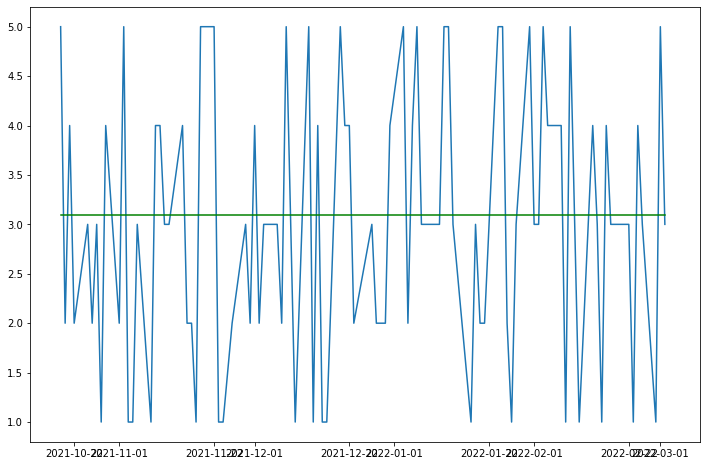

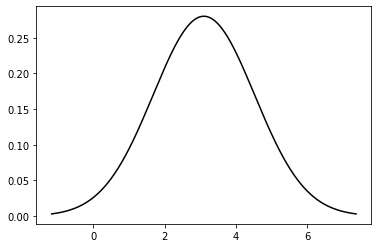

In [78]:
#Αυτή η συνάρτηση παίρνει τα data και κάνει την πρόβλεψη για μία μέρα για μία μετοχή 
#επιστρέφει την πρόβλεψη σε ranks και την σκέτη πρόβλεψη

def forecast_ses(rd3,i):
  insample=rd3.iloc[:-i]
  outsample=rd3.iloc[-i:-i+1]
  print('to insample ftanei mexri ',rd3.iloc[:-i].tail(1))
  print('to outsample einai :',outsample.index)
  model = SimpleExpSmoothing(np.asarray(insample.values))
  fit1 = model.fit()
  pred1=fit1.forecast(1) 

  ####FOR VISUALIZATIONS--------
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(insample.index[200:], insample.values[200:])
  ax.plot(outsample.index, outsample.values, color="red")
  #f=zip((pred1),(fit1))
  ax.plot(insample.index[200:], fit1.fittedvalues[200:], color="green")
  #####---------

  # print(round(pred1[0]))
  dif=np.subtract(insample.values,fit1.fittedvalues)
  print(fit1.fittedvalues[60:-2])
  me=dif.mean()
  sd=dif.std()
  data= np.arange((pred1[0]+me)-3*sd,(pred1[0]+me)+ 3*sd,0.001)
  pdf = norm.pdf(data , loc = pred1[0]+me , scale = sd+me)#loc:mean,scale:sd
  #####-----
  plt.figure()
  sns.lineplot(data, pdf , color = 'black')
  #---------
  p1=norm(loc = pred1+me , scale = sd+me).cdf(1)
  p2=norm(loc = pred1+me , scale = sd+me).cdf(2)-p1
  p3=norm(loc = pred1+me , scale = sd+me).cdf(3)-p1-p2
  p4=norm(loc = pred1+me , scale = sd+me).cdf(4)-p1-p2-p3
  p5=norm(loc = pred1+me , scale = sd+me).cdf(5)-p1-p2-p3-p4
  temp=[]
  temp.append(p1[0])
  temp.append(p2[0])
  temp.append(p3[0])
  temp.append(p4[0])
  temp.append(p5[0])
  # print(temp)
  print('gia to outsample:',outsample,'tha exoume',temp)
  data={
      'prediction':temp,
      'round_pred': round(pred1[0])
  }
  #temporary for visualization
  #print(dif)
  # plt.figure(figsize=(12, 8))
  # plt.plot(insample.values[200:], marker="o", color="black")
  # plt.plot(fit1.fittedvalues[200:], marker="o", color="blue")
  forecast=pd.DataFrame(data)
  return forecast
print(forecast_ses(rd3['PRU'],20)['prediction'].values)

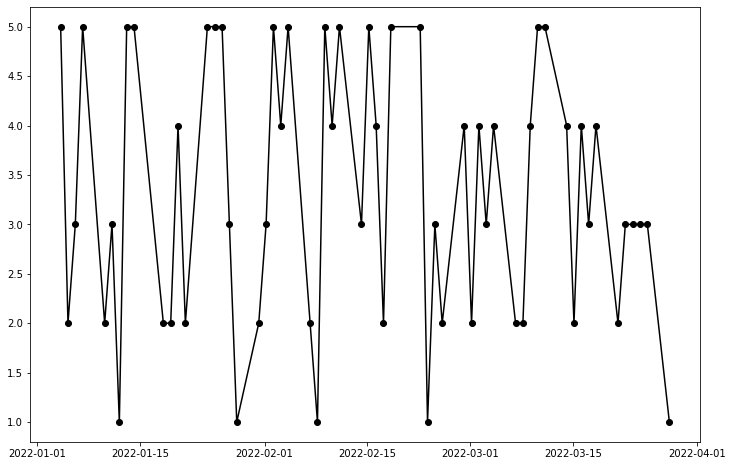

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(rd3['ABBV'].iloc[253:-2], marker="o", color="black")
# plt.plot(fit1.fittedvalues, marker="o", color="blue")

In [16]:
temp=[]
date=[]
for i in range(60,1,-1):
      print('imera',rd3['ABBV'].iloc[-i:-i+1].index.date[0])
      date.append(rd3['ABBV'].iloc[-i:-i+1].index.date[0])
      temp.append(forecast_ses(rd3['ABBV'],i)['prediction'].values)

imera 2022-01-04
to insample ftanei mexri  Date
2022-01-03 00:00:00-05:00    2
Name: ABBV, dtype: int64
to outsample einai : DatetimeIndex(['2022-01-04 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[3.10276681 3.10276682 3.10276679 3.10276679 3.1027668  3.10276683
 3.10276684 3.10276687 3.10276688 3.10276687 3.10276688 3.10276688
 3.10276685 3.10276686 3.10276686 3.10276684 3.10276681 3.10276681
 3.10276681 3.10276678 3.10276676 3.10276679 3.10276679 3.10276679
 3.10276676 3.10276672 3.10276669 3.10276669 3.1027667  3.1027667
 3.10276673 3.10276673 3.10276671 3.10276673 3.10276671 3.10276672
 3.10276674 3.10276675 3.10276672 3.10276672 3.1027667  3.1027667
 3.10276667 3.10276664 3.10276665 3.10276665 3.10276665 3.10276665
 3.10276667 3.10276669 3.10276666 3.10276664 3.10276664 3.10276667
 3.10276665 3.10276662 3.10276662 3.10276663 3.10276664 3.10276664
 3.10276667 3.10276665 3.10276662 3.10276661 3.10276659 3.10276662
 3.10276663 3.10276665 3.1027

In [ ]:
rd3['ABBV'].iloc[-1:].index.date[0]

datetime.date(2022, 3, 30)

####SES model
***

In [ ]:
def SES(st):
  ses=dict()
  for j in st:
    temp=[]
    date=[]
    for i in range(60,1,-1):
      print('imera',rd3[j].iloc[-i:-i+1].index.date[0])
      date.append(rd3[j].iloc[-i:-i+1].index.date[0])
      temp.append(forecast_ses(rd3[j],i)['prediction'].values)
      # ses[rd3[j].name]=temp
    #for the last day 
    date.append(rd3[j].iloc[-1:].index.date[0])
    temp.append(forecast_ses(rd3[j],1)['prediction'].values)
    ses[rd3[j].name]=temp
  # print(date)
  ses['date']=date
  SES_final=pd.DataFrame.from_dict(ses)
  # SES_final['Date']=date
  # SES_final.set_index('Date')
  # print(SES_final)
  return SES_final
t=SES(rd3)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Name: PPL, dtype: int64 tha exoume [0.06589714998488083, 0.17486155400948994, 0.2988053934452313, 0.27704961993308247, 0.13935757124486248]
imera 2022-02-17
to insample ftanei mexri  Date
2022-02-16    4
Name: PPL, dtype: int64
to outsample einai : DatetimeIndex(['2022-02-17'], dtype='datetime64[ns]', name='Date', freq=None)
gia to outsample: Date
2022-02-17    1
Name: PPL, dtype: int64 tha exoume [0.06542701318805402, 0.17427030221194853, 0.2986176715846708, 0.2775332517718624, 0.13987912088590804]
imera 2022-02-18
to insample ftanei mexri  Date
2022-02-17    1
Name: PPL, dtype: int64
to outsample einai : DatetimeIndex(['2022-02-18'], dtype='datetime64[ns]', name='Date', freq=None)
gia to outsample: Date
2022-02-18    5
Name: PPL, dtype: int64 tha exoume [0.06653727058033479, 0.17529789015606198, 0.2984945028807887, 0.2763914959921214, 0.1391458025818071]
imera 2022-02-22
to insample ftanei mexri  Date
2022-02-18    5
Name: PPL, d

In [ ]:
t

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM,date
0,"[0.05930981627570897, 0.14724553654301648, 0.2...","[0.07828885289801556, 0.17070235994200472, 0.2...","[0.057762358971909636, 0.16162081667200406, 0....","[0.06769310051099901, 0.15776073929800977, 0.2...","[0.10994632190245568, 0.15111504484695304, 0.2...","[0.052795062442104544, 0.14323703329466644, 0....","[0.10007514112069632, 0.1681160544784442, 0.24...","[0.05199647991869468, 0.13799435395393725, 0.2...","[0.061823509183113995, 0.15577581409209665, 0....","[0.0692943415943843, 0.1533682256907345, 0.259...",...,"[0.11950120957305582, 0.16292172545880879, 0.2...","[0.07653548448368946, 0.16272244298218902, 0.2...","[0.09082534511404822, 0.16784751023495736, 0.2...","[0.09241236528356217, 0.16687652855541196, 0.2...","[0.061722127243959236, 0.15233751605538762, 0....","[0.11215951070856794, 0.16037998122045932, 0.2...","[0.07224954422591272, 0.16838748728316333, 0.2...","[0.05412226034560486, 0.15548056303962943, 0.2...","[0.1037333419657675, 0.16300171081742704, 0.23...",2022-01-04
1,"[0.05900976599053288, 0.14641525964749336, 0.2...","[0.07795797923141, 0.16969165181841045, 0.2743...","[0.05727272240133807, 0.1610060961336784, 0.29...","[0.06791498654458282, 0.15823783448172551, 0.2...","[0.11108376277876708, 0.15175324377604515, 0.2...","[0.05232233901569873, 0.14272326472309865, 0.2...","[0.09960185509656361, 0.1681301812847319, 0.24...","[0.05171591201205944, 0.1379519082793177, 0.25...","[0.06130099666789267, 0.1552365707763918, 0.27...","[0.06872921591657154, 0.15289798419436879, 0.2...",...,"[0.11964357381154994, 0.16328956678857015, 0.2...","[0.07612439719441273, 0.1626856346933419, 0.26...","[0.0920228797101898, 0.16867231568018848, 0.25...","[0.0936054518749051, 0.16768454255472276, 0.25...","[0.06119869594397022, 0.15182344026564604, 0.2...","[0.11328919679008004, 0.16102677898459278, 0.2...","[0.07182764140693693, 0.16831560539424345, 0.2...","[0.055368364544622135, 0.15677337106253025, 0....","[0.10311434623770066, 0.1622198779228392, 0.23...",2022-01-05
2,"[0.05927196004892501, 0.14692213392913508, 0.2...","[0.07813029310370843, 0.1701388499293685, 0.27...","[0.05748243507143418, 0.16151833971325436, 0.2...","[0.06915370006448682, 0.1592976744889196, 0.26...","[0.11036818311003477, 0.1511384050217498, 0.21...","[0.051854243226309715, 0.1422115532246217, 0.2...","[0.0997551918490403, 0.16853072940008418, 0.25...","[0.051436976816979556, 0.13790850604600347, 0....","[0.06094581734978825, 0.15516778891806893, 0.2...","[0.06816937747007704, 0.15242938896470173, 0.2...",...,"[0.11891768150133913, 0.16257832168252512, 0.2...","[0.07575370693691803, 0.1617701128914516, 0.26...","[0.09153890456162794, 0.16776359377959754, 0.2...","[0.09376848977378854, 0.1680960478921512, 0.25...","[0.06244195881062862, 0.15296586732563514, 0.2...","[0.11282579761489658, 0.1610845165808092, 0.22...","[0.07200917051892383, 0.1687790478500403, 0.28...","[0.05661051989704998, 0.15804121186593686, 0.2...","[0.10249830123417514, 0.16144776298580954, 0.2...",2022-01-06
3,"[0.058950342428452804, 0.14687654639372844, 0....","[0.07779907521526883, 0.16914261231346753, 0.2...","[0.05733020244718171, 0.16052995183633803, 0.2...","[0.06936766318499551, 0.15976644906039525, 0.2...","[0.11149529344885206, 0.1517691156316528, 0.21...","[0.0513907246334626, 0.14170188255437227, 0.26...","[0.09928453491467526, 0.16854291750350042, 0.2...","[0.05172382036332878, 0.13844809211496972, 0.2...","[0.06059270914398666, 0.15509793384739953, 0.2...","[0.0676171884819223, 0.15196283770831834, 0.25...",...,"[0.1200146123768302, 0.16318659940629743, 0.22...","[0.07538136029590166, 0.1608674092243929, 0.26...","[0.09087054240441289, 0.16731937720015938, 0.2...","[0.09494839678118094, 0.16888890523293165, 0.2...","[0.06267996752736263, 0.15345734245338596, 0.2...","[0.1139445232218218, 0.16172392823660353, 0.23...","[0.07218826835390273, 0.16924020598204925, 0.2...","[0.0

In [ ]:
t2=pd.DataFrame.from_dict(t)
t2.set_index('date')

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.05930981627570897, 0.14724553654301648, 0.2...","[0.07828885289801556, 0.17070235994200472, 0.2...","[0.057762358971909636, 0.16162081667200406, 0....","[0.06769310051099901, 0.15776073929800977, 0.2...","[0.10994632190245568, 0.15111504484695304, 0.2...","[0.052795062442104544, 0.14323703329466644, 0....","[0.10007514112069632, 0.1681160544784442, 0.24...","[0.05199647991869468, 0.13799435395393725, 0.2...","[0.061823509183113995, 0.15577581409209665, 0....","[0.0692943415943843, 0.1533682256907345, 0.259...",...,"[0.07253277226001452, 0.15101384035028959, 0.2...","[0.11950120957305582, 0.16292172545880879, 0.2...","[0.07653548448368946, 0.16272244298218902, 0.2...","[0.09082534511404822, 0.16784751023495736, 0.2...","[0.09241236528356217, 0.16687652855541196, 0.2...","[0.061722127243959236, 0.15233751605538762, 0....","[0.11215951070856794, 0.16037998122045932, 0.2...","[0.07224954422591272, 0.16838748728316333, 0.2...","[0.05412226034560486, 0.15548056303962943, 0.2...","[0.1037333419657675, 0.16300171081742704, 0.23..."
2022-01-05,"[0.05900976599053288, 0.14641525964749336, 0.2...","[0.07795797923141, 0.16969165181841045, 0.2743...","[0.05727272240133807, 0.1610060961336784, 0.29...","[0.06791498654458282, 0.15823783448172551, 0.2...","[0.11108376277876708, 0.15175324377604515, 0.2...","[0.05232233901569873, 0.14272326472309865, 0.2...","[0.09960185509656361, 0.1681301812847319, 0.24...","[0.05171591201205944, 0.1379519082793177, 0.25...","[0.06130099666789267, 0.1552365707763918, 0.27...","[0.06872921591657154, 0.15289798419436879, 0.2...",...,"[0.07277830492140873, 0.15147411453265064, 0.2...","[0.11964357381154994, 0.16328956678857015, 0.2...","[0.07612439719441273, 0.1626856346933419, 0.26...","[0.0920228797101898, 0.16867231568018848, 0.25...","[0.0936054518749051, 0.16768454255472276, 0.25...","[0.06119869594397022, 0.15182344026564604, 0.2...","[0.11328919679008004, 0.16102677898459278, 0.2...","[0.07182764140693693, 0.16831560539424345, 0.2...","[0.055368364544622135, 0.15677337106253025, 0....","[0.10311434623770066, 0.1622198779228392, 0.23..."
2022-01-06,"[0.05927196004892501, 0.14692213392913508, 0.2...","[0.07813029310370843, 0.1701388499293685, 0.27...","[0.05748243507143418, 0.16151833971325436, 0.2...","[0.06915370006448682, 0.1592976744889196, 0.26...","[0.11036818311003477, 0.1511384050217498, 0.21...","[0.051854243226309715, 0.1422115532246217, 0.2...","[0.0997551918490403, 0.16853072940008418, 0.25...","[0.051436976816979556, 0.13790850604600347, 0....","[0.06094581734978825, 0.15516778891806893, 0.2...","[0.06816937747007704, 0.15242938896470173, 0.2...",...,"[0.07219846515107917, 0.15104103184415477, 0.2...","[0.11891768150133913, 0.16257832168252512, 0.2...","[0.07575370693691803, 0.1617701128914516, 0.26...","[0.09153890456162794, 0.16776359377959754, 0.2...","[0.09376848977378854, 0.1680960478921512, 0.25...","[0.06244195881062862, 0.15296586732563514, 0.2...","[0.11282579761489658, 0.1610845165808092, 0.22...","[0.07200917051892383, 0.1687790478500403, 0.28...","[0.05661051989704998, 0.15804121186593686, 0.2...","[0.10249830123417514, 0.16144776298580954, 0.2..."
2022-01-07,"[0.058950342428452804, 0.14687654639372844, 0....","[0.07779907521526883, 0.16914261231346753, 0.2...","[0.05733020244718171, 0.16052995183633803, 0.2...","[0.06936766318499551, 0.15976644906039525, 0.2...","[0.11149529344885206, 0.1517691156316528, 0.21...","[0.0513907246334626, 0.14170188255437227, 0.26...","[0.09928453491467526, 0.16854291750350042, 0.2...","[0.05172382036332878, 0.13844809211496972, 0.2...","[0.06059270914398666, 0.15509793384739953, 0.2...","[0.0676171884819223, 0.15196283770831834, 0.25...",...,"[0.07178594700416499, 0.1502441166399542, 0.25...","[0.1200146123768302, 0.16318659940629743, 0.22...","[0.07538136029590166, 0.1608674092243929, 0.26...","[0.09087054240441289, 0.1673

In [ ]:
def create_historical(prob):
  prob=prob.rename_axis("symbol", axis="columns")
  prob=prob.T
  prob['date']=prob.columns.date[0]
  prob.columns = ['price', 'date']
  prob=prob.reset_index()
  prob=prob[['symbol','date','price']]
  return prob

In [ ]:
#now we want to calculate the RPS for each day using rd and t2
# RPS=pd.DataFrame(columns=t2.columns,index=t2['date'])
# RPS=pd.DataFrame(columns=t2.columns)
RPS=pd.DataFrame()

# RPS=RPS.drop('date',axis=1)
# print(RPS.index[2])
for k in t2.index: #for everyday of a stock->index
  print(t2['date'][k])
  prob=pd.DataFrame()
  prob1=pd.DataFrame()
  predic=pd.DataFrame()
  if(t2['date'][k]!=t2['date'].tail(1).values): #if it's not for the last day 
    #for historical data of two days 
    prob=rd.loc[(rd.index.date==t2['date'][k])]
    prob1=rd.loc[ (rd.index.date==t2['date'][k+1])]
    prob=create_historical(prob)
    prob1=create_historical(prob1)
    hist_data=prob.append(prob1)
    # print(hist_data)
    predic=t2.loc[t2['date']==t2['date'][k]] #find predictions of this day
    predic=predic.drop('date',axis=1)
    # print(predic)
    data=pd.DataFrame(index=predic.columns)
    data=data.reset_index()
    # print(data)
    data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
    for i in range(len(np.array_split(predic.values[0],46))-1):
      # print(i)
      # print(data.loc[i])
      # print(np.array_split(predic.values[0],46)[i][0])
      data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
    data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
    # print(data)
    #now we have data->predictions and hist_data->historical data so now we can call the RPS
    rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
    # print(rps) ->rps for every stock for one day 
    # print(rps['RPS'])
    tmp=pd.DataFrame(rps['RPS'].values).T
    # print(tmp.T)
    RPS=RPS.append(tmp,ignore_index=True)
    # print(RPS[RPS.index==k])

    
  else:
    #for the last day
    prob=rd.loc[(rd.index.date==t2['date'][k])]
    prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]
    prob=create_historical(prob)
    prob1=create_historical(prob1)
    hist_data=prob.append(prob1)
    # print(hist_data)
    predic=t2.loc[t2['date']==t2['date'][k]] #find predictions of this day
    predic=predic.drop('date',axis=1)
    # print(predic)
    data=pd.DataFrame(index=predic.columns)
    data=data.reset_index()
    # print(data)
    data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
    for i in range(len(np.array_split(predic.values[0],46))-1):
      # print(i)
      # print(np.array_split(predic.values[0],46)[i][0])
      data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
    data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
    # print(data)
    #now we have data->predictions and hist_data->historical data so now we can call the RPS
    rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
    # print(rps) ->rps for every stock for one day 
    # print(rps['RPS'])
    tmp=pd.DataFrame(rps['RPS'].values).T
    # print(tmp.T)
    RPS=RPS.append(tmp,ignore_index=True) 
               
print(RPS)


2022-01-04
      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.064480       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.046830       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.045000       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.034775       5.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.033464       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030930       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.029212       8.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029174       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.027556      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.026942      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.026204      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.024830      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.023339      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.022102      15.0 

In [ ]:
d=t2['date']
name=t2.columns[:-1]
# print(np.split(name.values,len(name)))
# print(d.values)
RPS['date']=d.values
RPS=RPS.set_index('date')
RPS.columns=assets
RPS

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.166287,0.193668,0.071257,0.184080,0.343066,0.064911,0.075843,0.084526,0.070068,0.071238,...,0.192342,0.170212,0.073579,0.334110,0.334296,0.069123,0.330052,0.068201,0.364526,0.179975
2022-01-05,0.197988,0.170089,0.180125,0.356346,0.165196,0.064689,0.168639,0.084396,0.073621,0.070991,...,0.071805,0.181873,0.182559,0.188281,0.170177,0.366709,0.083619,0.172051,0.362645,0.178868
2022-01-06,0.079820,0.192892,0.189395,0.182239,0.342773,0.064469,0.075487,0.208528,0.073518,0.070746,...,0.166525,0.323184,0.181319,0.080579,0.332192,0.189827,0.328799,0.171547,0.360788,0.082055
2022-01-07,0.165921,0.069464,0.357728,0.181685,0.185835,0.080436,0.168247,0.083888,0.362903,0.079029,...,0.082176,0.321776,0.074598,0.080278,0.330660,0.174014,0.172921,0.342172,0.070428,0.081385
2022-01-10,0.198427,0.339838,0.067481,0.073062,0.083567,0.162960,0.188249,0.207822,0.178731,0.078914,...,0.082054,0.182772,0.074325,0.335519,0.189396,0.076286,0.179514,0.077209,0.069158,0.177315
2022-01-11,0.079977,0.078200,0.179450,0.181748,0.165356,0.063953,0.168828,0.063880,0.069893,0.191275,...,0.081933,0.321658,0.351615,0.186947,0.330399,0.172930,0.328080,0.076889,0.360023,0.177286
2022-01-12,0.374375,0.192030,0.178906,0.181203,0.186761,0.063742,0.328749,0.063678,0.073846,0.078490,...,0.165752,0.320278,0.180092,0.171573,0.074138,0.191402,0.179449,0.067711,0.358217,0.081467
2022-01-13,0.166641,0.077480,0.066871,0.180663,0.164970,0.063534,0.083284,0.083802,0.187556,0.364002,...,0.164718,0.167925,0.178904,0.334665,0.329163,0.069146,0.327904,0.067621,0.356435,0.176833
2022-01-14,0.165556,0.077176,0.066785,0.073336,0.343276,0.386232,0.167921,0.063392,0.069710,0.077982,...,0.082930,0.141018,0.177734,0.170037,0.327684,0.076663,0.326484,0.193407,0.188435,0.175781


In [ ]:
RPS.to_excel('method1_ses.xlsx')
RPS.to_csv('method1_ses.csv')

In [ ]:
print(RPS.mean(axis=1).mean())


0.17117757802944694


#####Comparison with point forecast 
***

In [ ]:
t2.set_index('date',inplace=True)

In [ ]:
flag=False
for i in t2: #for every stock
  print(i)
  for j in range(len(t2[i].values)): #each day of this stock
    temp = t2[i].values[j]
    max= np.max(temp) #find max possiblity
    #replace this max possibility with 1
    temp2=np.where(temp!=max,0,temp)
    temp2=np.where(temp2==max,1,temp2)
    print(temp,'kai',temp2)
    if((temp2==1).sum()>1):
      print('isotimia')
      flag=True
      if((temp2==1).sum()==2):
        temp2=np.where(temp2==1,0.5,temp2)
        print(temp2)
      elif((temp2==1).sum()==3):
        temp2=np.where(temp2==1,0.333,temp2)
        print(temp2)
      elif((temp2==1).sum()==4):
        temp2=np.where(temp2==1,0.25,temp2)
        print(temp2)
      elif((temp2==1).sum()==5):
        temp2=np.where(temp2==1,0.2,temp2)
        print(temp2)
    t2[i].values[j]=temp2

ABBV
[0.05930982 0.14724554 0.26304691 0.27765777 0.17318248] kai [0. 0. 0. 1. 0.]
[0.05900977 0.14641526 0.26203483 0.27761963 0.17413798] kai [0. 0. 0. 1. 0.]
[0.05927196 0.14692213 0.2625283  0.27752731 0.17358356] kai [0. 0. 0. 1. 0.]
[0.05895034 0.14687655 0.2629569  0.27797726 0.17352396] kai [0. 0. 0. 1. 0.]
[0.05865533 0.14605796 0.2619564  0.2779375  0.17446741] kai [0. 0. 0. 1. 0.]
[0.05891564 0.14656039 0.26244492 0.27784509 0.1739177 ] kai [0. 0. 0. 1. 0.]
[0.05859959 0.14651523 0.26286839 0.27829019 0.17385824] kai [0. 0. 0. 1. 0.]
[0.05981902 0.14765932 0.26298334 0.27714691 0.17283711] kai [0. 0. 0. 1. 0.]
[0.05952417 0.14684954 0.26200094 0.27711263 0.17376625] kai [0. 0. 0. 1. 0.]
[0.05922788 0.14604963 0.2610335  0.27707656 0.17468082] kai [0. 0. 0. 1. 0.]
[0.05948352 0.1465402  0.26151123 0.27699039 0.17414576] kai [0. 0. 0. 1. 0.]
[0.05973651 0.14702789 0.2619867  0.27690433 0.17361337] kai [0. 0. 0. 1. 0.]
[0.05924443 0.14655908 0.26192149 0.27735574 0.17403798] ka

In [ ]:
flag

False

In [ ]:
t2=t2.reset_index()

In [ ]:
RPS=pd.DataFrame()

# RPS=RPS.drop('date',axis=1)
# print(RPS.index[2])
for k in t2.index: #for everyday of a stock->index
  prob=pd.DataFrame()
  prob1=pd.DataFrame()
  predic=pd.DataFrame()
  if(t2['date'][k]!=t2['date'].tail(1).values): #if it's not for the last day 
    #for historical data of two days 
    prob=rd.loc[(rd.index.date==t2['date'][k])]
    prob1=rd.loc[ (rd.index.date==t2['date'][k+1])]
    prob=create_historical(prob)
    prob1=create_historical(prob1)
    hist_data=prob.append(prob1)
    # print(hist_data)
    predic=t2.loc[t2['date']==t2['date'][k]] #find predictions of this day
    predic=predic.drop('date',axis=1)
    # print(predic)
    data=pd.DataFrame(index=predic.columns)
    data=data.reset_index()
    # print(data)
    data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
    for i in range(len(np.array_split(predic.values[0],46))-1):
      # print(i)
      print(np.array_split(predic.values[0],46)[i][0])
      data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
    data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
    # print(data)
    print(np.max(hist_data.date))
    #now we have data->predictions and hist_data->historical data so now we can call the RPS
    rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
    # print(rps) ->rps for every stock for one day 
    # print(rps['RPS'])
    tmp=pd.DataFrame(rps['RPS'].values).T
    # print(tmp.T)
    RPS=RPS.append(tmp,ignore_index=True)
    # print(RPS[RPS.index==k])

    
  else:
    #for the last day
    prob=rd.loc[(rd.index.date==t2['date'][k])]
    prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]
    prob=create_historical(prob)
    prob1=create_historical(prob1)
    hist_data=prob.append(prob1)
    # print(hist_data)
    predic=t2.loc[t2['date']==t2['date'][k]] #find predictions of this day
    predic=predic.drop('date',axis=1)
    # print(predic)
    data=pd.DataFrame(index=predic.columns)
    data=data.reset_index()
    # print(data)
    data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
    for i in range(len(np.array_split(predic.values[0],46))-1):
      # print(i)
      # print(np.array_split(predic.values[0],46)[i][0])
      data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
    data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
    # print(data)
    
    print(hist_data)
    #now we have data->predictions and hist_data->historical data so now we can call the RPS
    rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
    
    # print(rps) ->rps for every stock for one day 
    # print(rps['RPS'])
    tmp=pd.DataFrame(rps['RPS'].values).T
    # print(tmp.T)
    RPS=RPS.append(tmp,ignore_index=True)              
print(RPS)

[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
2022-01-05
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0.

In [ ]:
d=t2['date']
name=t2.columns[:-1]
# print(np.split(name.values,len(name)))
# print(d.values)
RPS['date']=d.values
RPS=RPS.set_index('date')
RPS.columns=assets
RPS

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.2,0.4,0.2,0.4,0.6,0.0,0.0,0.2,0.0,0.0,...,0.4,0.2,0.0,0.4,0.4,0.0,0.4,0.0,0.6,0.4
2022-01-05,0.4,0.2,0.2,0.6,0.2,0.0,0.2,0.2,0.2,0.0,...,0.0,0.4,0.4,0.4,0.2,0.6,0.0,0.2,0.6,0.4
2022-01-06,0.2,0.4,0.4,0.4,0.6,0.0,0.0,0.4,0.2,0.0,...,0.2,0.4,0.4,0.2,0.4,0.4,0.4,0.2,0.4,0.2
2022-01-07,0.2,0.0,0.4,0.4,0.4,0.2,0.2,0.2,0.6,0.2,...,0.2,0.4,0.0,0.2,0.4,0.2,0.2,0.4,0.2,0.0
2022-01-10,0.4,0.4,0.0,0.2,0.0,0.2,0.4,0.4,0.2,0.2,...,0.2,0.4,0.0,0.4,0.4,0.2,0.4,0.2,0.0,0.4
2022-01-11,0.2,0.2,0.2,0.4,0.2,0.0,0.2,0.0,0.0,0.4,...,0.2,0.4,0.6,0.4,0.4,0.2,0.4,0.2,0.4,0.4
2022-01-12,0.6,0.4,0.2,0.2,0.4,0.0,0.4,0.0,0.2,0.2,...,0.2,0.4,0.2,0.2,0.0,0.4,0.4,0.0,0.4,0.0
2022-01-13,0.2,0.2,0.0,0.2,0.2,0.0,0.2,0.2,0.4,0.6,...,0.2,0.2,0.2,0.4,0.4,0.0,0.4,0.0,0.4,0.4
2022-01-14,0.2,0.2,0.0,0.2,0.6,0.6,0.2,0.0,0.0,0.2,...,0.2,0.2,0.2,0.2,0.4,0.2,0.4,0.4,0.4,0.2


In [ ]:
RPS.mean(axis=1).mean()

0.2581481481481481

In [ ]:
#save results 
RPS.to_excel('Method_1-SES_ranks_POINT_FORECAST.xlsx')